<a href="https://colab.research.google.com/github/lucianosilva-github/compiladores/blob/main/VAR_COM_RUBRICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE DE VALOR EM RISCO(VaR) EM CARTEIRAS**

**GRUPO**

*   Ana Carolina dos Santos
*   Bernardo Alvarenga Silva



# **INTRODUÇÃO**
<p>Estimar o risco de uma carteira é muito importante para o crescimento do capital a longo prazo. Existem muitas técnicas para ajudar a gerenciar riscos, mas aqui abordaremos o 'valor em risco' (VaR).</p>
<p>Existem duas formas principais de calcular o VaR:</p>
<ol>
<li>Usando a simulação de Monte Carlo</li>
<li>Usando o <a href="https://www.investopedia.com/ask/answers/041715/what-variancecovariance-matrix-or-parametric-method-value-risk-var.asp" target="_blank ">método de variância-covariância</a></li>
</ol>

<p>O VaR fornece uma estimativa da perda máxima de uma determinada carteira durante um período de tempo. Você pode calcular o VaR em vários níveis de confiança.</p>
<p>Por exemplo, dado um VaR de 250.000 com 95% de confiança, há 95% de chance de que seu portfólio não perca mais de 250.000 no dia seguinte.</p>
<p>Observe que o cálculo padrão do VaR pressupõe o seguinte:</p>
<ul>
<li><b>Distribuição normal de retornos</b> - O VaR assume que os retornos da carteira são normalmente distribuídos. Obviamente, isso não é realista para a maioria dos ativos, mas nos permite desenvolver uma linha de base usando um cálculo muito mais simplista. </p>
<li><b>Condições de mercado padrão</b> - Como muitos instrumentos financeiros, o VaR é melhor usado para considerar perdas em mercados padrão e não é adequado para eventos extremos/outlier.</li>
</ul>
</p>

Este trabalho apresenta o uso do método da variância-covariância para estimação do Var de uma carteira.


*RESERVADO PARA COMENTÁRIOS DO AVALIADOR SOBRE A INTRODUÇÃO*

# **METODOLOGIA**

<p>Para calcular o VaR da carteira, serão seguidos os passos abaixo:</p>
<ol>
   <li>Calcule retornos periódicos das ações em seu portfólio</li>
   <li>Crie uma matriz de covariância com base nos retornos</li>
   <li>Calcule a média e o desvio padrão do portfólio
   <br><i>(ponderado com base nos níveis de investimento de cada ação em carteira)</i></li>
   <li>Calcule o inverso da distribuição cumulativa normal (PPF) com um intervalo de confiança especificado, desvio padrão e média</li>
    <li>Estime o valor em risco (VaR) para o portfólio subtraindo o investimento inicial do cálculo na etapa 4</li>
   </ol>

1) Calcule retornos periódicos das ações em sua carteira

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datetime as dt
import yfinance as yf

company = 'AAPL'

# Define a start date and End Date
start = dt.datetime(2020,1,1)
end =  dt.datetime(2022,1,1)

# Read Stock Price Data
data = yf.download(company, start , end)

data.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-17,169.929993,173.470001,169.690002,171.139999,169.658417,195432700
2021-12-20,168.279999,170.580002,167.460007,169.750000,168.280441,107499100
2021-12-21,171.559998,173.199997,169.119995,172.990005,171.492386,91185900
2021-12-22,173.039993,175.860001,172.149994,175.639999,174.119431,92135300
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.753906,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.768860,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.737839,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.827072,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,176.657272,59773000


In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


tickers = ['AAPL','C', 'DIS']
weights = np.array([.25,.15, .3])
initial_investment = 1000000
start = dt.datetime(2023,1,1)
end =  dt.datetime(2023,6,1)

dataAAPL=yf.download('AAPL', start , end)['Close']
dataC=yf.download('C', start , end)['Close']
dataDIS=yf.download('DIS', start , end)['Close']
data = pd.DataFrame({'AAPL': dataAAPL, 'C': dataC, 'DIS': dataDIS})
print(data)
returns = data.pct_change()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  AAPL          C        DIS
Date                                        
2023-01-03  125.070000  45.779999  88.970001
2023-01-04  126.360001  46.959999  91.980003
2023-01-05  125.019997  46.750000  91.919998
2023-01-06  129.619995  47.310001  93.919998
2023-01-09  130.149994  47.540001  94.769997
...                ...        ...        ...
2023-05-24  171.839996  44.490002  89.070000
2023-05-25  172.990005  44.230000  88.139999
2023-05-26  175.429993  44.599998  88.290001
2023-05-30  177.300003  44.700001  87.820000
2023-05-31  177.250000  44.320000  87.959999

[103 rows x 3 columns]


In [ ]:
returns.tail()

,AAPL,C,DIS
Date,,,
2023-05-24,0.001632,-0.030930,-0.008350
2023-05-25,0.006692,-0.005844,-0.010441
2023-05-26,0.014105,0.008365,0.001702
2023-05-30,0.010660,0.002242,-0.005323
2023-05-31,-0.000282,-0.008501,0.001594


2) Crie uma matriz de covariância com base nos retornos


In [ ]:
cov_matrix = returns.cov()
cov_matrix


,AAPL,C,DIS
AAPL,0.000188,0.000078,0.000138
C,0.000078,0.000364,0.000176
DIS,0.000138,0.000176,0.000354


3) Calcule a média e o desvio padrão da carteira

In [ ]:
avg_rets = returns.mean()
port_mean = avg_rets.dot(weights)
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
mean_investment = (1+port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev

4) Calcule o inverso da distribuição cumulativa normal (PPF) com um intervalo de confiança especificado, desvio padrão e média

In [ ]:
conf_level1 = 0.05
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)


5) Estime o valor em risco (VaR) para o portfólio subtraindo o investimento inicial do cálculo na etapa 4

In [ ]:
var_1d1 = initial_investment - cutoff1
var_1d1

15084.465823756298

*RESERVADO PARA COMENTÁRIOS DO AVALIADOR SOBRE A METODOLOGIA*

# **ANÁLISE DOS RESULTADOS**

Os resultados anteriores evidenciam que, com 95% de confiança, a perda de nosso portfólio não excederá ~ $ 15,08 mil em um período de um dia. E se quiséssemos calcular isso em uma janela de tempo maior? Abaixo, podemos fazer isso facilmente, apenas pegando nosso VaR de 1 dia e multiplicando-o pela raiz quadrada do período de tempo.

1 day VaR @ 95% confidence: 15084.47
2 day VaR @ 95% confidence: 21332.66
3 day VaR @ 95% confidence: 26127.06
4 day VaR @ 95% confidence: 30168.93
5 day VaR @ 95% confidence: 33729.89
6 day VaR @ 95% confidence: 36949.24
7 day VaR @ 95% confidence: 39909.75
8 day VaR @ 95% confidence: 42665.31
9 day VaR @ 95% confidence: 45253.4
10 day VaR @ 95% confidence: 47701.27
11 day VaR @ 95% confidence: 50029.51
12 day VaR @ 95% confidence: 52254.12
13 day VaR @ 95% confidence: 54387.81
14 day VaR @ 95% confidence: 56440.9
15 day VaR @ 95% confidence: 58421.88
16 day VaR @ 95% confidence: 60337.86
17 day VaR @ 95% confidence: 62194.85
18 day VaR @ 95% confidence: 63997.97
19 day VaR @ 95% confidence: 65751.66
20 day VaR @ 95% confidence: 67459.78
21 day VaR @ 95% confidence: 69125.71
22 day VaR @ 95% confidence: 70752.42
23 day VaR @ 95% confidence: 72342.56
24 day VaR @ 95% confidence: 73898.49
25 day VaR @ 95% confidence: 75422.33
26 day VaR @ 95% confidence: 76915.99
27 day VaR @ 95% confid

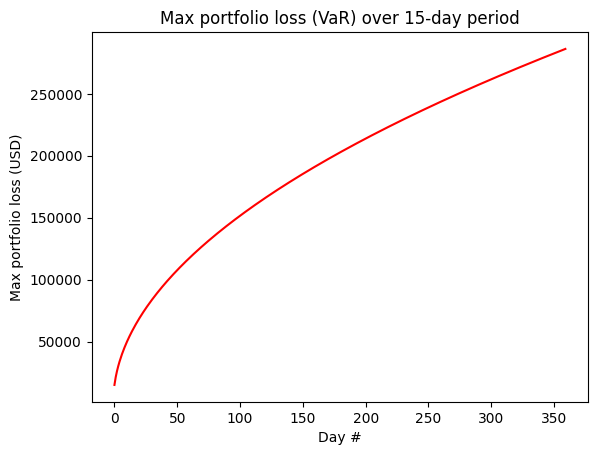

In [ ]:
var_array = []
num_days = int(360)
for x in range(1, num_days+1):
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")


Pode-se, ainda, verificar as distribuições de nossas ações em relação à distribuição normal.

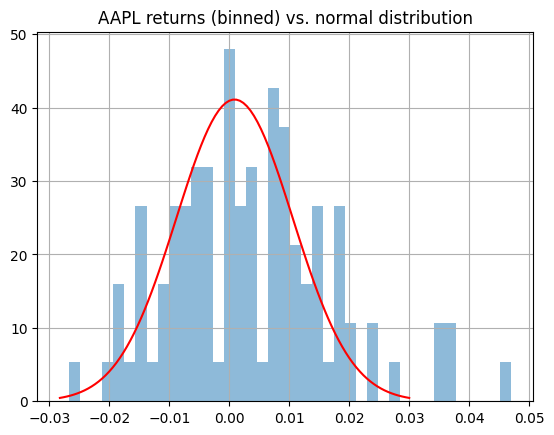

In [ ]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy

returns['AAPL'].hist(bins=40,histtype="stepfilled",alpha=0.5,density=True)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()

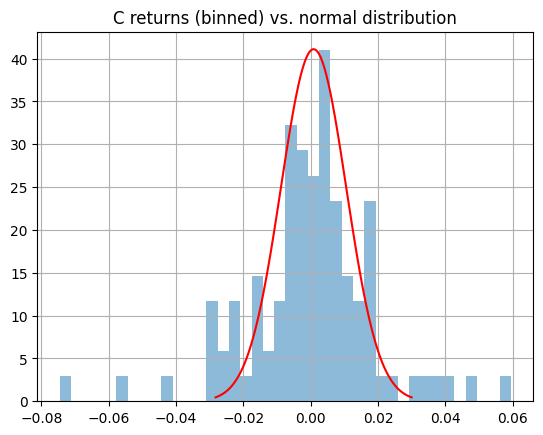

In [ ]:
returns['C'].hist(bins=40, histtype="stepfilled",alpha=0.5, density=True)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("C returns (binned) vs. normal distribution")
plt.show()

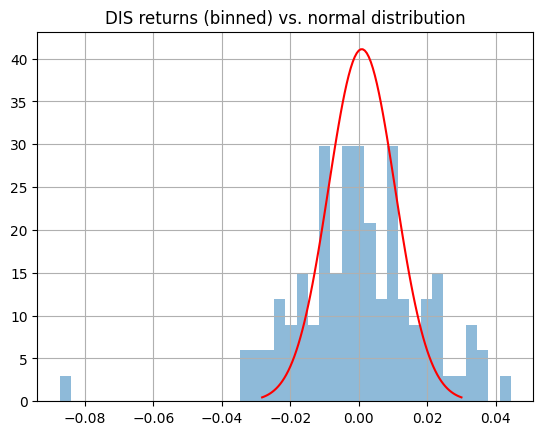

In [ ]:
returns['DIS'].hist(bins=40,histtype="stepfilled",alpha=0.5, density=True)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("DIS returns (binned) vs. normal distribution")
plt.show()

*RESERVADO PARA COMENTÁRIOS DO AVALIADOR SOBRE A ANÁLISE DOS RESULTADOS*

# **CONCLUSÃO**

O cálculo e análise do VaR revelou-se com uma indicador importante para avaliação do risco em carteira de ações. O metodologia permitiu a análise conjunta de um grabnde número de ações, assim como a distribuição de cada ação em separado.

Este pode notebook pode ser utilizado diretamente alterando-se diretamente os dados de entrada ou estendido para análises mais complexas.

*RESERVADO PARA COMENTÁRIOS DO AVALIADOR SOBRE A CONCLUSÃO*

**AVALIAÇÃO SEGUNDO RUBRICA DO PE**

In [ ]:
import datetime
import ipywidgets as widgets

start_date = widgets.DatePicker(
    description='Data apresentação',
    disabled=False
)
end_date = widgets.DatePicker(
    description='Data Avaliação',
    disabled=False
)

widgets.HBox([start_date, end_date])

In [ ]:
grade = widgets.SelectMultiple(
    options=['INSUFICIENTE', 'BÁSICO', 'EM DESENVOLVIMENTO', 'PROFICIENTE'],
    value=['INSUFICIENTE', 'BÁSICO', 'EM DESENVOLVIMENTO', 'PROFICIENTE'],
    description='Conceito',
    disabled=False,
    rows=4
)

display(grade)


SelectMultiple(description='Conceito', index=(0, 1, 2, 3), options=('INSUFICIENTE', 'BÁSICO', 'EM DESENVOLVIME…